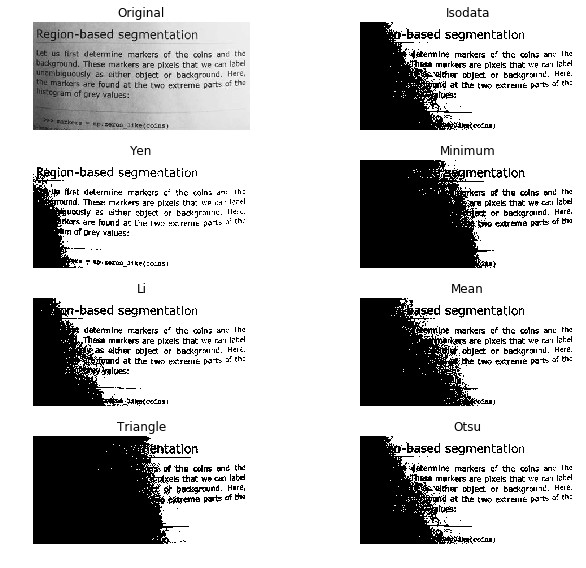

In [1]:
#http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]


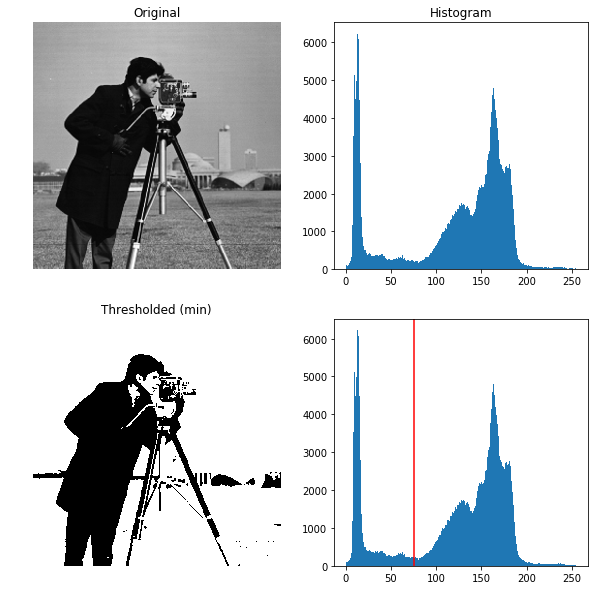

In [35]:
from skimage.filters import threshold_minimum
image = data.camera()

thresh_min = threshold_minimum(image)
print(image > thresh_min)
binary_min = image > thresh_min

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(image.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary_min, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(image.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

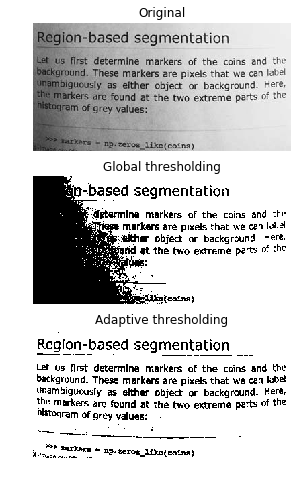

In [36]:
from skimage.filters import threshold_otsu, threshold_local


image = data.page()

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
adaptive_thresh = threshold_local(image, block_size, offset=10)
binary_adaptive = image > adaptive_thresh

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_adaptive)
ax[2].set_title('Adaptive thresholding')

for a in ax:
    a.axis('off')

plt.show()

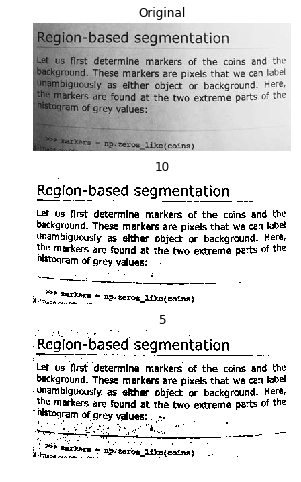

In [37]:
from skimage.filters import threshold_otsu, threshold_local, threshold_sauvola, threshold_triangle
image = data.page()
block_size5 = 35
adaptive_thresh5 = threshold_local(image, block_size5, offset=5)
binary_adaptive5 = image > adaptive_thresh5
block_size10 = 21
adaptive_thresh10 = threshold_triangle(image)
binary_adaptive10 = image > adaptive_thresh10
fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()
ax[0].imshow(image)
ax[0].set_title('Original')
ax[1].imshow(binary_adaptive)
ax[1].set_title('10')
ax[2].imshow(binary_adaptive5)
ax[2].set_title('5')
for a in ax:
    a.axis('off')
plt.show()

(191, 384)


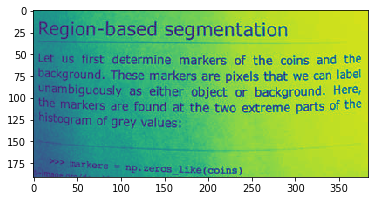

In [3]:
import cv2
import numpy as np
import skimage
from skimage import img_as_ubyte
from skimage import img_as_uint
image = data.page()
out = img_as_uint((image))
print(out.shape)
%matplotlib inline

plt.imshow(out)
plt.show()



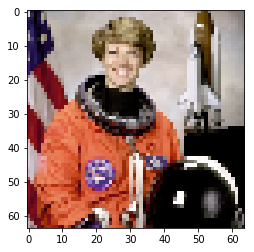

0.1


In [2]:
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import numpy as np
astronaut = data.astronaut()
astronaut = ia.imresize_single_image(astronaut, (64, 64))

%matplotlib inline

plt.imshow(astronaut)
plt.show()
print(ia.__version__)

In [8]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np

# random example images
images = np.random.randint(0, 255, (16, 128, 128, 3), dtype=np.uint8)

# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second image.
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Define our sequence of augmentation steps that will be applied to every image
# All augmenters with per_channel=0.5 will sample one value _per image_
# in 50% of all cases. In all other cases they will sample new values
# _per channel_.
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.2), # vertically flip 20% of all images
        sometimes(iaa.Crop(percent=(0, 0.1))), # crop images by 0-10% of their height/width
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
#             cval=(0, 255)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
                sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                iaa.OneOf([
                    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                ]),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges
                sometimes(iaa.OneOf([
                    iaa.EdgeDetect(alpha=(0, 0.7)),
                    iaa.DirectedEdgeDetect(alpha=(0, 0.7), direction=(0.0, 1.0)),
                ])),
                iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                iaa.OneOf([
                    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                ]),
                iaa.Invert(0.05, per_channel=True), # invert color channels
                iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                iaa.Multiply((0.5, 1.5), per_channel=0.5), # change brightness of images (50-150% of original value)
                iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5), # improve or worsen the contrast
                iaa.Grayscale(alpha=(0.0, 1.0)),
                sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))) # sometimes move parts of the image around
            ],
            random_order=True
        )
    ],
    random_order=True
)

print(images.shape)
images_aug = seq.augment_images(images)
print(images_aug.shape)

(16, 128, 128, 3)
(16, 128, 128, 3)


(32, 64, 64, 3)
(64, 64, 3)


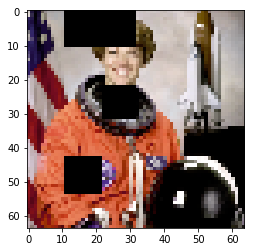

(32, 64, 64, 3)
(64, 64, 3)


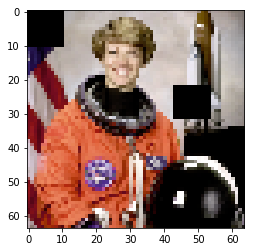

(32, 64, 64, 3)
(64, 64, 3)


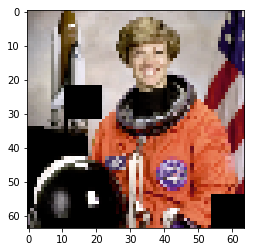

(32, 64, 64, 3)
(64, 64, 3)


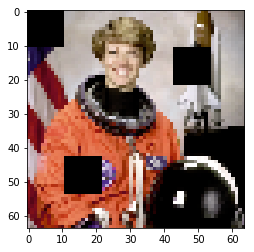

(32, 64, 64, 3)
(64, 64, 3)


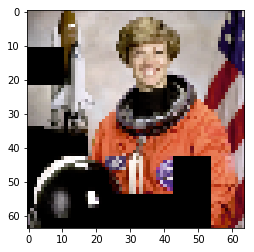

(32, 64, 64, 3)
(64, 64, 3)


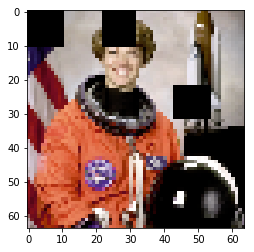

(32, 64, 64, 3)
(64, 64, 3)


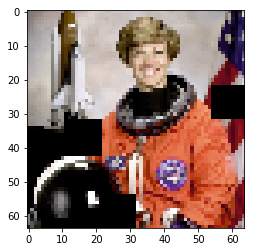

(32, 64, 64, 3)
(64, 64, 3)


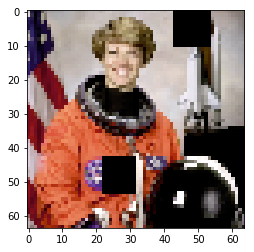

(32, 64, 64, 3)
(64, 64, 3)


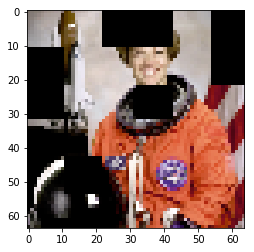

(32, 64, 64, 3)
(64, 64, 3)


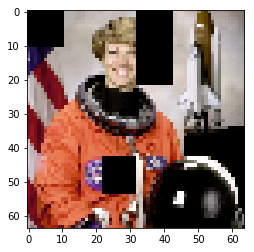

In [17]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
from skimage import data
from scipy import misc

# Number of batches and batch size for this example
nb_batches = 10
batch_size = 32

# Example augmentation sequence to run in the background
augseq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.CoarseDropout(p=0.1, size_percent=0.1)
])

# For simplicity, we use the same image here many times
astronaut = data.astronaut()
astronaut = ia.imresize_single_image(astronaut, (64, 64))

# Make batches out of the example image (here: 10 batches, each 32 times
# the example image)
batches = []
for _ in range(nb_batches):
    batches.append(
        np.array(
            [astronaut for _ in range(batch_size)],
            dtype=np.uint8
        )
    )

# Show the augmented images.
# Note that augment_batches() returns a generator.
for images_aug in augseq.augment_batches(batches):
    print(images_aug.shape)
    for img in images_aug:
        print(img.shape)
        %matplotlib inline
        plt.imshow(img)
        plt.show()
        break
        

(191, 384, 3)
(32, 100, 100, 3)
(100, 100, 3)


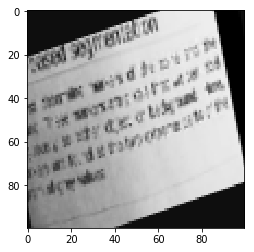

(32, 100, 100, 3)
(100, 100, 3)


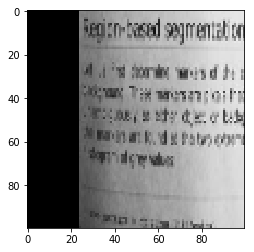

(32, 100, 100, 3)
(100, 100, 3)


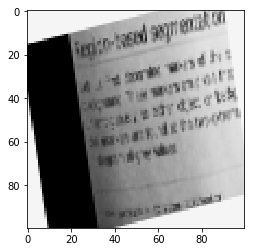

(32, 100, 100, 3)
(100, 100, 3)


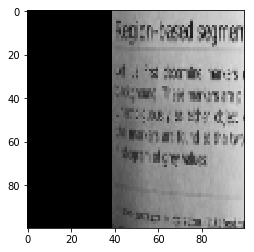

(32, 100, 100, 3)
(100, 100, 3)


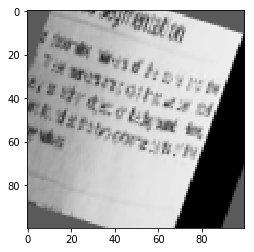

(32, 100, 100, 3)
(100, 100, 3)


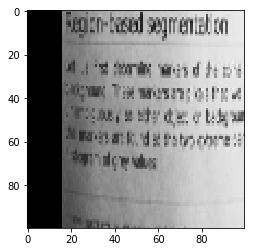

(32, 100, 100, 3)
(100, 100, 3)


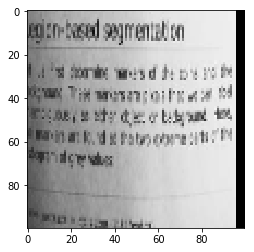

(32, 100, 100, 3)
(100, 100, 3)


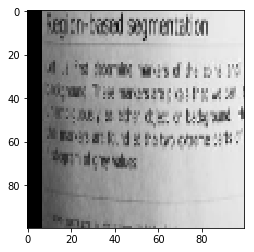

(32, 100, 100, 3)
(100, 100, 3)


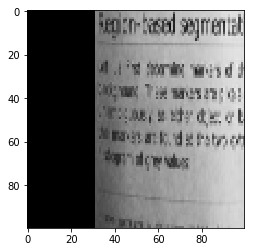

(32, 100, 100, 3)
(100, 100, 3)


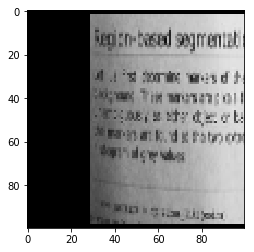

In [37]:
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
from skimage import data
from scipy import misc

# Number of batches and batch size for this example
nb_batches = 10
batch_size = 32

# Example augmentation sequence to run in the background
augseq = iaa.Sequential([
    iaa.Affine(translate_px={"x": (-40, 40)}, name="Affine"),
    iaa.Affine(scale={"y": (0.8, 1.2)}),
    sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            shear=(-16, 16), # shear by -16 to +16 degrees
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
         )),
])

# For simplicity, we use the same image here many times
astronaut = data.page()
# astronaut = data.astronaut()
astronaut = cv2.cvtColor(astronaut, cv2.COLOR_GRAY2RGB)
#astronaut = cv2.resize(astronaut,(512,512,3))
print(astronaut.shape)

astronaut = ia.imresize_single_image(astronaut, (100, 100))

# Make batches out of the example image (here: 10 batches, each 32 times
# the example image)
batches = []
for _ in range(nb_batches):
    batches.append(
        np.array(
            [astronaut for _ in range(batch_size)],
            dtype=np.uint8
        )
    )

# Show the augmented images.
# Note that augment_batches() returns a generator.
for images_aug in augseq.augment_batches(batches):
    print(images_aug.shape)
    for img in images_aug:
        print(img.shape)
        %matplotlib inline
        plt.imshow(img)
        plt.show()
        break
        